<a href="https://colab.research.google.com/github/ayazaban/Tensorflow-projects/blob/main/Description_de_limage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


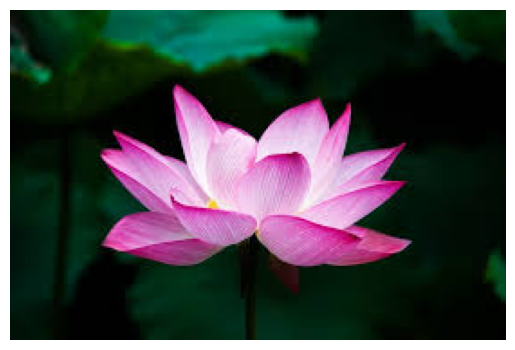

📌 Description de l'image :
L'image semble contenir : pinwheel.
Autres possibilités : daisy, pot.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image

# Charger le modèle pré-entraîné InceptionV3
model = InceptionV3(weights="imagenet")

# Fonction pour charger et prétraiter une image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Redimensionner l’image
    img_array = image.img_to_array(img)  # Convertir en tableau numpy
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch
    img_array = preprocess_input(img_array)  # Prétraiter pour InceptionV3
    return img_array

# Fonction pour classer une image et générer une description
def classify_and_describe(img_path):
    img_array = preprocess_image(img_path)

    # Prédiction avec InceptionV3
    predictions = model.predict(img_array)

    # Décoder les 3 classes les plus probables
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Afficher l'image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Générer une description textuelle
    description = f"L'image semble contenir : {decoded_predictions[0][1]}."
    description += f"\nAutres possibilités : {decoded_predictions[1][1]}, {decoded_predictions[2][1]}."

    return description

# Spécifier le chemin de votre image
image_path = "/content/images (1).jpg"

# Classifier et afficher la description
description = classify_and_describe(image_path)
print(f"📌 Description de l'image :\n{description}")